# 📊 Análise Comparativa de Filtros Espaciais entre Grupos
**Estudantes**: Bianca Duarte e Luiz Fernando <br>
**Disciplina:** ES235 - Processamento de Imagem  
**Instituição:** Universidade Federal de Pernambuco (UFPE)  
**Período:** 2025.2

---

## Objetivo

Este notebook apresenta uma análise comparativa do desempenho de **cinco filtros espaciais** para remoção de ruído, implementados por diferentes grupos da disciplina. Os dados foram extraídos das tabelas de "Média" dos relatórios de cada grupo.

### Filtros Analisados
- Gaussian Blur (GB)
- Moving Average (MA)
- Median (Med)
- Wiener (Wien)
- IBSF (Interference-Based Speckle Filter)

### Métricas de Avaliação
- **SSIM** - Índice de Similaridade Estrutural (Structural Similarity Index)
- **SNR** - Relação Sinal-Ruído (Signal-to-Noise Ratio) em dB
- **RMSE** - Erro Quadrático Médio Raiz (Root Mean Squared Error)

---

## 1. Fundamentação Teórica: Descrição dos Filtros

### 1.1 Gaussian Blur (Desfoque Gaussiano)

O **Gaussian Blur** é um filtro passa-baixa (*low-pass filter*) que utiliza uma função Gaussiana bidimensional como kernel de convolução. Cada pixel é substituído por uma média ponderada de seus vizinhos, onde os pesos seguem uma distribuição Gaussiana — pixels mais próximos do centro têm maior influência.

**Características:**
- Suaviza a imagem removendo ruído de alta frequência
- Pode causar *borramento* (*blurring*) nas bordas
- O parâmetro principal é o tamanho do kernel (ex: 3×3, 5×5, 11×11)

---

### 1.2 Moving Average (Média Móvel)

O **Moving Average** (também chamado de *Box Filter*) é o filtro linear mais simples. Substitui cada pixel pela **média aritmética** de todos os pixels dentro de uma janela retangular.

**Formulação:**
$$g(x,y) = \frac{1}{n} \sum_{(i,j) \in W(x,y)} f(i,j)$$

Onde $W(x,y)$ é a janela centrada em $(x,y)$ e $n$ é o número de pixels na janela.

**Características:**
- Implementação simples e rápida
- Todos os pixels na janela têm peso igual
- Tende a borrar bordas significativamente

---

### 1.3 Median Filter (Filtro de Mediana)

O **Median Filter** é um filtro **não-linear** que substitui cada pixel pelo valor **mediano** da vizinhança. É particularmente eficaz na remoção de ruído impulsivo (*salt-and-pepper noise*).

> *"A median filter is a nonlinear filter that has the ability to smooth images by removing extreme data without blurring the edges."* — Cardoso et al. (2012)

**Características:**
- Preserva bordas melhor que filtros lineares
- Remove efetivamente valores extremos (outliers)
- Janelas circulares podem evitar artefatos de "blocos"

---

### 1.4 Wiener Filter (Filtro de Wiener Adaptativo)

O **Wiener Filter** é um filtro **adaptativo** que ajusta sua resposta com base nas estatísticas locais da imagem. O parâmetro $\alpha$ controla o balanço entre suavização e preservação:

**Formulação:**
$$g(x,y) = \alpha \cdot f(x,y) + (1 - \alpha) \cdot \bar{f}(x,y)$$

Onde:
- $\bar{f}(x,y)$ é a média local
- $\alpha = 1 - \frac{\sigma_H^2}{\sigma_W^2}$ (razão entre variância homogênea e variância da janela)

**Importante:** O parâmetro $\alpha$ deve pertencer ao intervalo $[0, 1]$:
- $\alpha = 0$: suavização máxima (regiões homogêneas)
- $\alpha = 1$: preservação total (bordas)

---

### 1.5 IBSF - Interference-Based Speckle Filter (Filtro Baseado em Interferência)

O **IBSF** é um filtro desenvolvido especificamente para remoção de ruído *speckle* em imagens de ultrassom, baseado na física da interferência de ondas. Consiste em **três etapas**:

1. **Filtro de Mediana** (grande): Suavização inicial
2. **Supressão de Interferência Destrutiva**: Seleciona o máximo entre a imagem original e a filtrada
   $$I_C(x,y) = \max\{I(x,y), I_{Med}(x,y)\}$$
3. **Supressão de Interferência Construtiva**: Filtro de mediana com janela pequena para eliminar *speckles* brilhantes remanescentes

> *"ISF is a simple but effective filter... It is able to smooth images without blurring edges."* — Cardoso et al. (2012)

**Vantagem:** Preserva informação estrutural enquanto remove ruído granular.

---

## 2. Métricas de Avaliação de Qualidade

### 2.1 SSIM - Índice de Similaridade Estrutural (Structural Similarity Index)

O **SSIM** mede a similaridade estrutural entre duas imagens, considerando três componentes:

$$\text{SSIM}(x,y) = l(x,y) \cdot c(x,y) \cdot s(x,y)$$

Onde:
- $l(x,y)$ = comparação de **luminância** (*luminance*)
- $c(x,y)$ = comparação de **contraste** (*contrast*)  
- $s(x,y)$ = comparação de **estrutura** (*structure*)

**Fórmula completa:**
$$\text{SSIM} = \frac{(2\mu_x\mu_y + C_1)(2\sigma_{xy} + C_2)}{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)}$$

**Interpretação:**
- SSIM = 1: imagens idênticas
- SSIM próximo de 0: sem similaridade estrutural
- **Quanto maior, melhor** a preservação da estrutura

> *"The SSIM takes three different comparisons into consideration: correlation, luminance and contrast."* — Wang et al. (2004)

---

### 2.2 SNR - Relação Sinal-Ruído (Signal-to-Noise Ratio)

O **SNR** quantifica a razão entre a potência do sinal original e a potência do ruído residual, expresso em decibéis (dB):

$$\text{SNR} = 10 \log_{10}\left(\frac{P_{sinal}}{P_{ruído}}\right)$$

Onde:
$$P_{sinal} = \sum_{x,y} [I_{original}(x,y)]^2$$
$$P_{ruído} = \sum_{x,y} [I_{original}(x,y) - I_{filtrada}(x,y)]^2$$

**Interpretação:**
- **Quanto maior o SNR (em dB), melhor** a remoção de ruído
- Valores típicos: 10-20 dB para boa filtragem

---

### 2.3 RMSE - Erro Quadrático Médio Raiz (Root Mean Squared Error)

O **RMSE** mede a diferença média entre a imagem filtrada e a imagem de referência:

$$\text{RMSE} = \sqrt{\frac{\sum_{x,y} [I_{filtrada}(x,y) - I_{referência}(x,y)]^2}{\sum_{x,y} [I_{referência}(x,y)]^2}}$$

**Interpretação:**
- RMSE = 0: imagens idênticas
- **Quanto menor, melhor** a fidelidade da imagem filtrada

---

## 3. Importar Bibliotecas Necessárias 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


---

## 4. Preparação dos Dados

Os dados abaixo foram extraídos das tabelas de **"Média"** dos relatórios dos grupos.

**Observações:**
- Removemos o outlier do Grupo 1 (GB) 
- Normalizamos dados discrepantes onde a escala estava diferente

In [ ]:
data = [
    # --- Gaussian Blur (GB) ---
    {'Grupo': 'G2', 'Filtro': 'Gaussian Blur', 'Kernel': '11x11', 'SSIM': 0.331, 'SNR': 12.658, 'RMSE': 39.678},
    {'Grupo': 'G3', 'Filtro': 'Gaussian Blur', 'Kernel': '9x9', 'SSIM': 0.456, 'SNR': 12.599, 'RMSE': 38.890},
    # G4 GB removido do SNR pois a escala estava diferente (0.15 vs 12.0)
    {'Grupo': 'G4', 'Filtro': 'Gaussian Blur', 'Kernel': '7x7', 'SSIM': 0.863, 'SNR': None, 'RMSE': 0.477}, 
    
    # --- Moving Average (MA) ---
    {'Grupo': 'G1', 'Filtro': 'Moving Avg', 'Kernel': '5x5', 'SSIM': 0.677, 'SNR': 11.840, 'RMSE': 39.159},
    {'Grupo': 'G2', 'Filtro': 'Moving Avg', 'Kernel': '3x3', 'SSIM': 0.289, 'SNR': 12.440, 'RMSE': 40.661},
    {'Grupo': 'G4', 'Filtro': 'Moving Avg', 'Kernel': '9x9', 'SSIM': 0.639, 'SNR': 12.059, 'RMSE': 0.155},
    {'Grupo': 'G3', 'Filtro': 'Moving Avg', 'Kernel': '11x11', 'SSIM': 0.643, 'SNR': 11.842, 'RMSE': 40.153},

    # --- Median (Med) ---
    {'Grupo': 'G1', 'Filtro': 'Median', 'Kernel': '7x7', 'SSIM': 0.737, 'SNR': 14.199, 'RMSE': 34.873},
    {'Grupo': 'G2', 'Filtro': 'Median', 'Kernel': '5x5', 'SSIM': 0.357, 'SNR': 14.724, 'RMSE': 36.039},
    {'Grupo': 'G4', 'Filtro': 'Median', 'Kernel': '11x11', 'SSIM': 0.629, 'SNR': 13.803, 'RMSE': 0.137},
    {'Grupo': 'G3', 'Filtro': 'Median', 'Kernel': '3x3', 'SSIM': 0.251, 'SNR': 6.433, 'RMSE': 40.351},

    # --- IBSF ---
    {'Grupo': 'G1', 'Filtro': 'IBSF', 'Kernel': '11x11', 'SSIM': 0.720, 'SNR': 13.478, 'RMSE': 38.600},
    {'Grupo': 'G2', 'Filtro': 'IBSF', 'Kernel': '9x9', 'SSIM': 0.183, 'SNR': 11.237, 'RMSE': 58.742},
    {'Grupo': 'G4', 'Filtro': 'IBSF', 'Kernel': '5x5', 'SSIM': 0.355, 'SNR': 14.398, 'RMSE': 0.153},
    {'Grupo': 'G3', 'Filtro': 'IBSF', 'Kernel': '7x7', 'SSIM': 0.476, 'SNR': 14.502, 'RMSE': 37.017},

    # --- Wiener ---
    {'Grupo': 'G1', 'Filtro': 'Wiener', 'Kernel': '9x9', 'SSIM': 0.602, 'SNR': 8.516, 'RMSE': 50.004},
    {'Grupo': 'G2', 'Filtro': 'Wiener', 'Kernel': '7x7', 'SSIM': 0.228, 'SNR': 13.341, 'RMSE': 44.569},
    {'Grupo': 'G4', 'Filtro': 'Wiener', 'Kernel': '3x3', 'SSIM': 0.269, 'SNR': 15.094, 'RMSE': 0.161},
    {'Grupo': 'G3', 'Filtro': 'Wiener', 'Kernel': '5x5', 'SSIM': 0.175, 'SNR': 9.351, 'RMSE': 59.354},
]

df = pd.DataFrame(data)

# Função auxiliar para extrair tamanho numérico do kernel
def get_kernel_size(k):
    return int(k.split('x')[0])

# Adicionar coluna com tamanho numérico e ordenar
df['Kernel_Size'] = df['Kernel'].apply(get_kernel_size)
df = df.sort_values('Kernel_Size')

print(f"📋 Total de registros: {len(df)}")
print(f"📊 Filtros analisados: {df['Filtro'].unique().tolist()}")
print(f"👥 Grupos participantes: {df['Grupo'].unique().tolist()}")
df.head(10)

📋 Total de registros: 19
📊 Filtros analisados: ['Moving Avg', 'Median', 'Wiener', 'IBSF', 'Gaussian Blur']
👥 Grupos participantes: ['G2', 'G3', 'G4', 'G1']


,Grupo,Filtro,Kernel,SSIM,SNR,RMSE,Kernel_Size
4,G2,Moving Avg,3x3,0.289,12.440,40.661,3
10,G3,Median,3x3,0.251,6.433,40.351,3
17,G4,Wiener,3x3,0.269,15.094,0.161,3
8,G2,Median,5x5,0.357,14.724,36.039,5
13,G4,IBSF,5x5,0.355,14.398,0.153,5
3,G1,Moving Avg,5x5,0.677,11.840,39.159,5
18,G3,Wiener,5x5,0.175,9.351,59.354,5
14,G3,IBSF,7x7,0.476,14.502,37.017,7
7,G1,Median,7x7,0.737,14.199,34.873,7
16,G2,Wiener,7x7,0.228,13.341,44.569,7


---

## 5. Visualização dos Resultados (Visualization)

### 5.1 Painel de Gráficos Comparativos

Geramos três visualizações principais:
1. **Gráfico de Barras (SSIM)** - Preservação da estrutura por filtro/kernel
2. **Gráfico de Dispersão (SNR)** - Relação sinal-ruído por filtro e grupo
3. **Mapa de Calor (Heatmap)** - Visão geral do desempenho SSIM

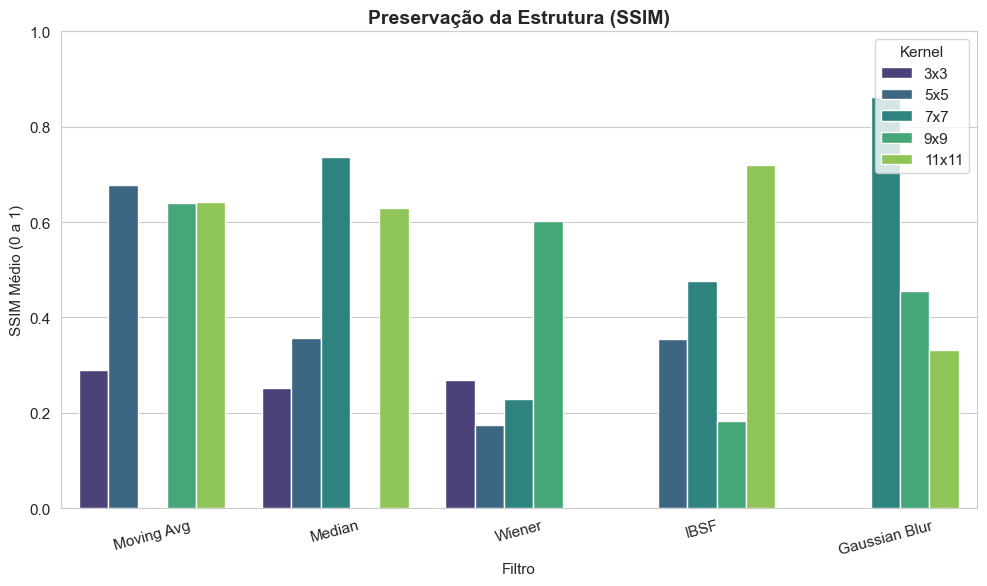

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico 1: SSIM (Estrutura) - Quanto mais próximo de 1, melhor
sns.barplot(data=df, x='Filtro', y='SSIM', hue='Kernel', palette='viridis', ax=ax)
ax.set_title('Preservação da Estrutura (SSIM)', fontsize=14, fontweight='bold')
ax.set_ylabel('SSIM Médio (0 a 1)')
ax.set_xlabel('Filtro')
ax.set_ylim(0, 1.0)
ax.legend(title='Kernel', loc='upper right')
ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

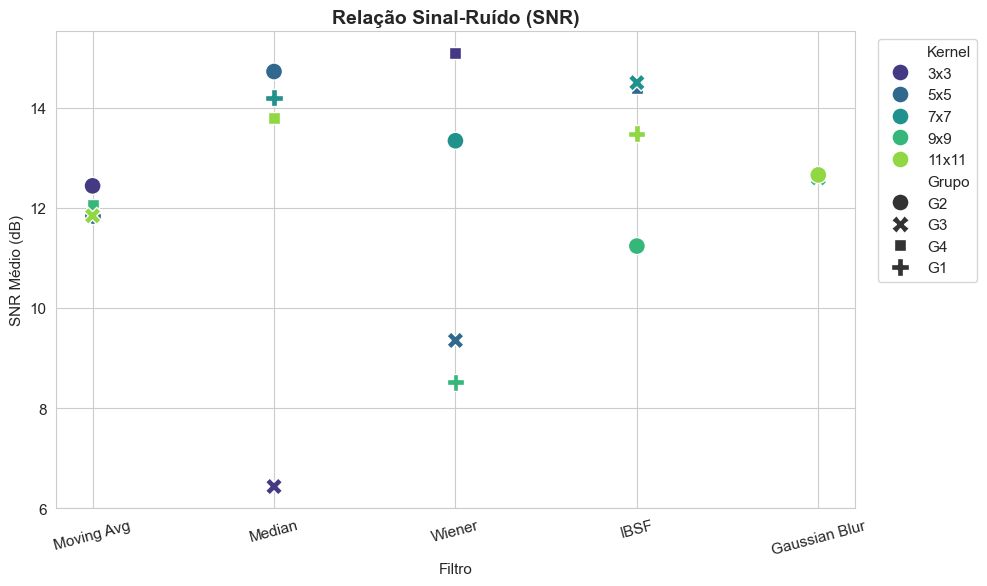

In [9]:
# Gráfico 2: SNR (Sinal-Ruído) - Quanto maior, melhor
# Filtramos dados nulos ou com escala incorreta para não distorcer o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
df_snr = df.dropna(subset=['SNR'])
sns.scatterplot(data=df_snr, x='Filtro', y='SNR', hue='Kernel', style='Grupo', s=150, palette='viridis', ax=ax)
ax.set_title('Relação Sinal-Ruído (SNR)', fontsize=14, fontweight='bold')
ax.set_ylabel('SNR Médio (dB)')
ax.set_xlabel('Filtro')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

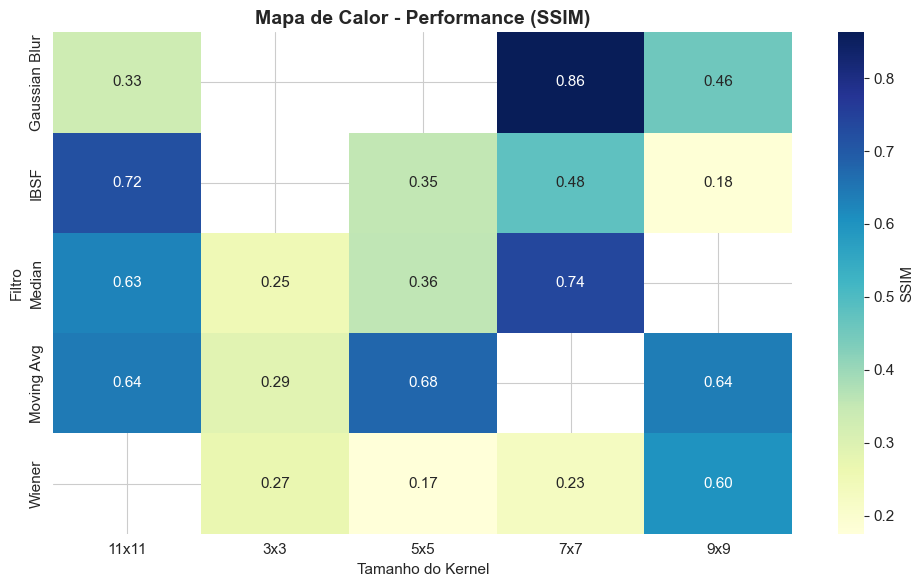

In [10]:
# Gráfico 3: Desempenho Geral (Heatmap simplificado)
# Pivoteando dados para ver qual filtro se saiu melhor em média
fig, ax = plt.subplots(figsize=(10, 6))
pivot_ssim = df.pivot_table(index='Filtro', columns='Kernel', values='SSIM')
sns.heatmap(pivot_ssim, annot=True, cmap="YlGnBu", fmt=".2f", ax=ax, cbar_kws={'label': 'SSIM'})
ax.set_title('Mapa de Calor - Performance (SSIM)', fontsize=14, fontweight='bold')
ax.set_xlabel('Tamanho do Kernel')
ax.set_ylabel('Filtro')
plt.tight_layout()
plt.show()

### 5.2 Gráficos de Distribuição e Variabilidade

Visualizações adicionais para análise detalhada da distribuição dos dados e comparação entre grupos.

C:\Users\Samsung\AppData\Local\Temp\ipykernel_18064\359423505.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Filtro', y='SSIM', palette='Set2', ax=axes[0])
C:\Users\Samsung\AppData\Local\Temp\ipykernel_18064\359423505.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_snr, x='Filtro', y='SNR', palette='Set2', ax=axes[1])


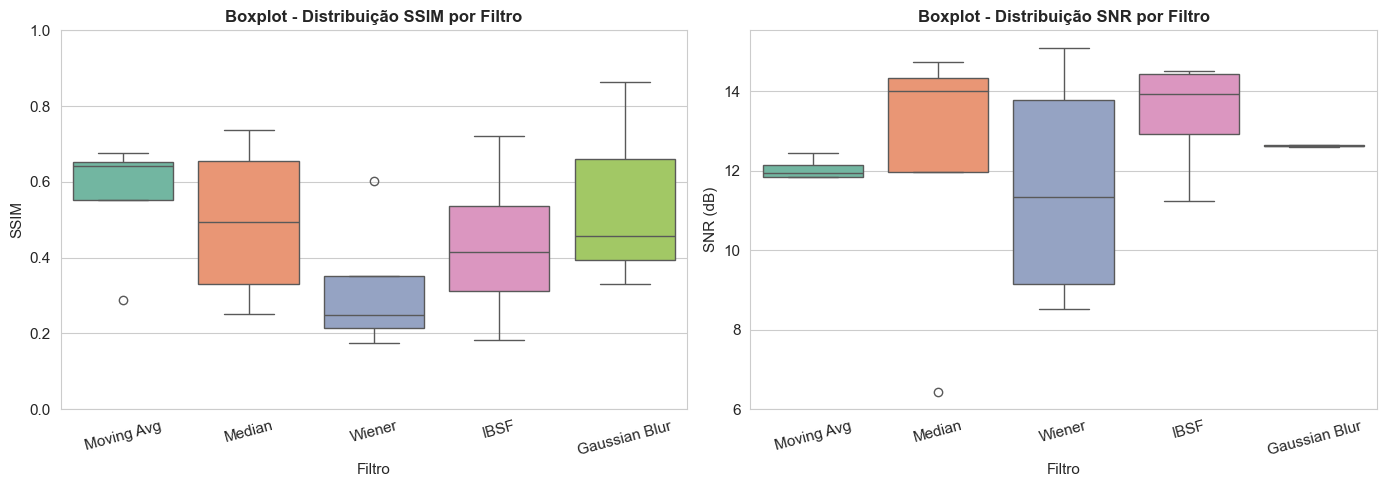

In [11]:
# Gráfico 4: Boxplot - Distribuição SSIM e SNR por Filtro
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot SSIM
sns.boxplot(data=df, x='Filtro', y='SSIM', palette='Set2', ax=axes[0])
axes[0].set_title('Boxplot - Distribuição SSIM por Filtro', fontsize=12, fontweight='bold')
axes[0].set_ylabel('SSIM')
axes[0].tick_params(axis='x', rotation=15)
axes[0].set_ylim(0, 1)

# Boxplot SNR
sns.boxplot(data=df_snr, x='Filtro', y='SNR', palette='Set2', ax=axes[1])
axes[1].set_title('Boxplot - Distribuição SNR por Filtro', fontsize=12, fontweight='bold')
axes[1].set_ylabel('SNR (dB)')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_18064\2499566893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Filtro', y='SSIM', palette='muted', ax=axes[0], inner='box')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_18064\2499566893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_snr, x='Filtro', y='SNR', palette='muted', ax=axes[1], inner='box')
C:\Users\Samsung\AppData\Local\Temp\ipykernel_18064\2499566893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_snr, x='Filtro', y='SNR', palette=

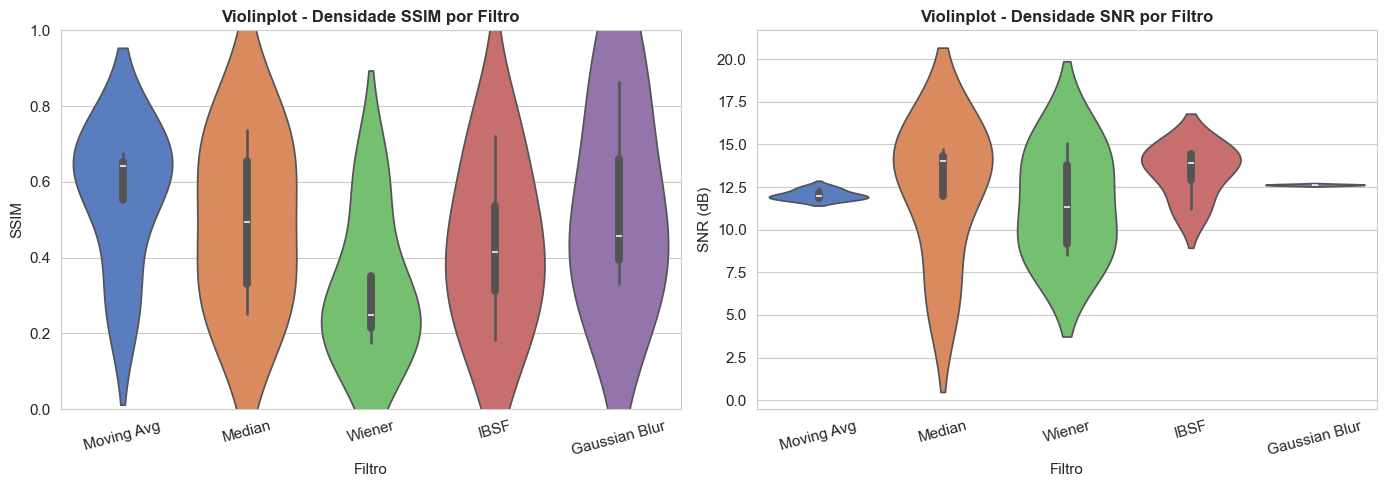

In [12]:
# Gráfico 5: Violinplot - Densidade da Distribuição por Filtro
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Violinplot SSIM
sns.violinplot(data=df, x='Filtro', y='SSIM', palette='muted', ax=axes[0], inner='box')
axes[0].set_title('Violinplot - Densidade SSIM por Filtro', fontsize=12, fontweight='bold')
axes[0].set_ylabel('SSIM')
axes[0].tick_params(axis='x', rotation=15)
axes[0].set_ylim(0, 1)

# Violinplot SNR
sns.violinplot(data=df_snr, x='Filtro', y='SNR', palette='muted', ax=axes[1], inner='box')
axes[1].set_title('Violinplot - Densidade SNR por Filtro', fontsize=12, fontweight='bold')
axes[1].set_ylabel('SNR (dB)')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

### 5.3 Análise de Trade-offs e Correlações

Gráficos para analisar a relação entre métricas e identificar trade-offs entre qualidade estrutural (SSIM) e remoção de ruído (SNR).

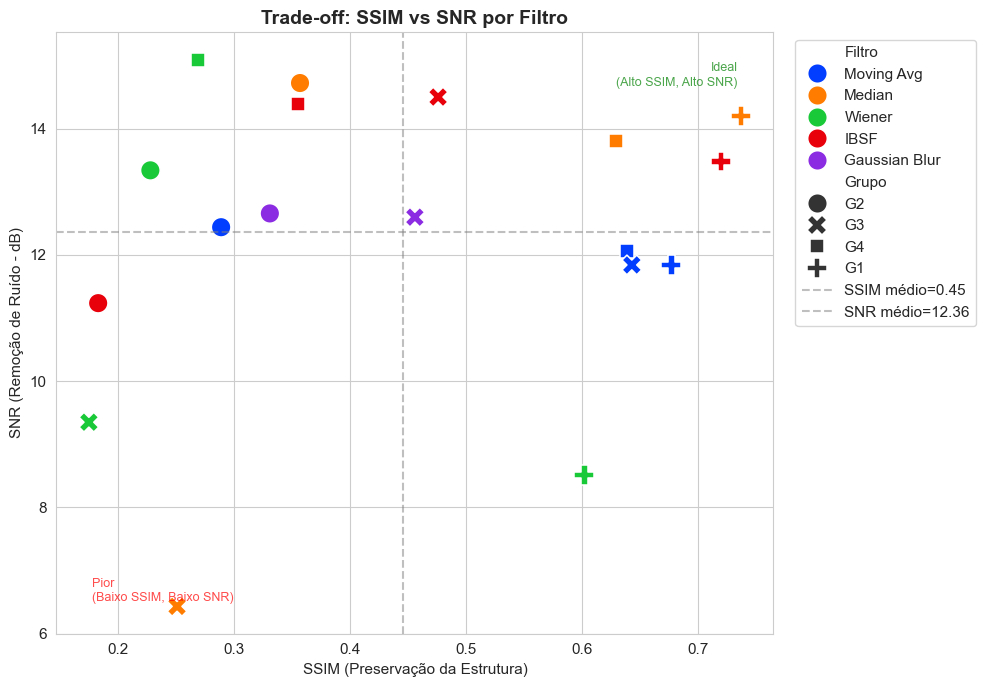

In [19]:
# Gráfico 6: Scatter SSIM vs SNR - Análise de Trade-off
fig, ax = plt.subplots(figsize=(10, 7))

# Scatter com cores por filtro e marcadores por grupo
scatter = sns.scatterplot(data=df_snr, x='SSIM', y='SNR', hue='Filtro', 
                          style='Grupo', s=200, palette='bright', ax=ax)
ax.set_title('Trade-off: SSIM vs SNR por Filtro', fontsize=14, fontweight='bold')
ax.set_xlabel('SSIM (Preservação da Estrutura)')
ax.set_ylabel('SNR (Remoção de Ruído - dB)')

# Linhas de referência para quadrantes
ssim_mean = df_snr['SSIM'].mean()
snr_mean = df_snr['SNR'].mean()
ax.axvline(x=ssim_mean, color='gray', linestyle='--', alpha=0.5, label=f'SSIM médio={ssim_mean:.2f}')
ax.axhline(y=snr_mean, color='gray', linestyle='--', alpha=0.5, label=f'SNR médio={snr_mean:.2f}')

# Anotação dos quadrantes
ax.text(0.95, 0.95, 'Ideal\n(Alto SSIM, Alto SNR)', transform=ax.transAxes, 
        ha='right', va='top', fontsize=9, color='green', alpha=0.7)
ax.text(0.05, 0.05, 'Pior\n(Baixo SSIM, Baixo SNR)', transform=ax.transAxes, 
        ha='left', va='bottom', fontsize=9, color='red', alpha=0.7)

ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

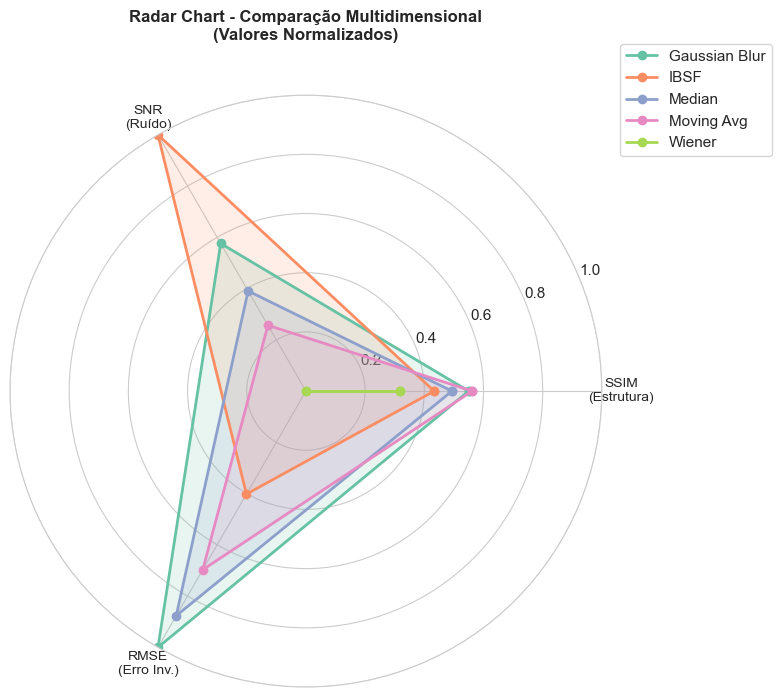

In [14]:
# Gráfico 7: Radar Chart - Comparação Multidimensional por Filtro
from math import pi

# Preparar dados médios por filtro (normalizar para escala 0-1)
radar_data = df.groupby('Filtro').agg({
    'SSIM': 'mean',
    'SNR': 'mean',
    'RMSE': 'mean'
}).reset_index()

# Normalização Min-Max
radar_data['SNR_norm'] = (radar_data['SNR'] - radar_data['SNR'].min()) / (radar_data['SNR'].max() - radar_data['SNR'].min())
radar_data['RMSE_norm'] = 1 - (radar_data['RMSE'] - radar_data['RMSE'].min()) / (radar_data['RMSE'].max() - radar_data['RMSE'].min())  # Invertido (menor é melhor)
radar_data['SSIM_norm'] = radar_data['SSIM']  # Já está entre 0-1

# Configuração do radar
categories = ['SSIM\n(Estrutura)', 'SNR\n(Ruído)', 'RMSE\n(Erro Inv.)']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Fechar o polígono

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = plt.cm.Set2.colors

for idx, row in radar_data.iterrows():
    values = [row['SSIM_norm'], row['SNR_norm'], row['RMSE_norm']]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Filtro'], color=colors[idx % len(colors)])
    ax.fill(angles, values, alpha=0.15, color=colors[idx % len(colors)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_ylim(0, 1)
ax.set_title('Radar Chart - Comparação Multidimensional\n(Valores Normalizados)', fontsize=12, fontweight='bold', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

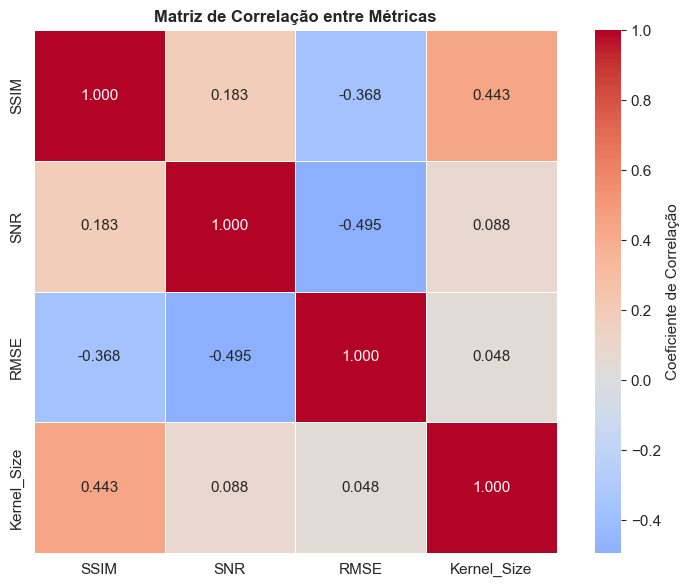


📊 Interpretação das Correlações:
--------------------------------------------------
• SSIM vs SNR: 0.183
• SSIM vs RMSE: -0.368
• SNR vs RMSE: -0.495
• Kernel_Size vs SSIM: 0.443


In [15]:
# Gráfico 8: Matriz de Correlação entre Métricas
fig, ax = plt.subplots(figsize=(8, 6))

# Calcular correlação entre métricas numéricas
correlation_matrix = df[['SSIM', 'SNR', 'RMSE', 'Kernel_Size']].corr()

# Heatmap de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', ax=ax, square=True, linewidths=0.5,
            cbar_kws={'label': 'Coeficiente de Correlação'})
ax.set_title('Matriz de Correlação entre Métricas', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Interpretação das Correlações:")
print("-" * 50)
print(f"• SSIM vs SNR: {correlation_matrix.loc['SSIM', 'SNR']:.3f}")
print(f"• SSIM vs RMSE: {correlation_matrix.loc['SSIM', 'RMSE']:.3f}")
print(f"• SNR vs RMSE: {correlation_matrix.loc['SNR', 'RMSE']:.3f}")
print(f"• Kernel_Size vs SSIM: {correlation_matrix.loc['Kernel_Size', 'SSIM']:.3f}")

### 5.4 Análise Comparativa por Grupo

Visualizações focadas na comparação entre os 4 grupos para identificar variabilidade e consistência nas implementações.

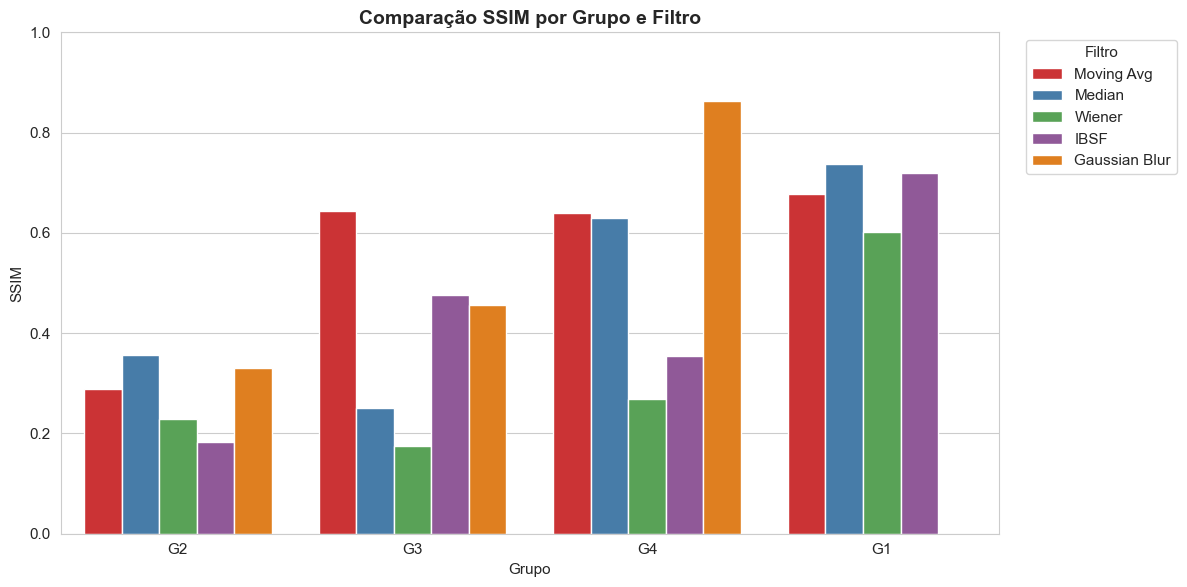


📊 Análise por Grupo:
------------------------------------------------------------
Moving Avg      → Melhor: G1 | Pior: G2
Median          → Melhor: G1 | Pior: G3
Wiener          → Melhor: G1 | Pior: G3
IBSF            → Melhor: G1 | Pior: G2
Gaussian Blur   → Melhor: G4 | Pior: G2


In [16]:
# Gráfico 9: Barras Agrupadas - SSIM por Grupo e Filtro
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=df, x='Grupo', y='SSIM', hue='Filtro', palette='Set1', ax=ax)
ax.set_title('Comparação SSIM por Grupo e Filtro', fontsize=14, fontweight='bold')
ax.set_ylabel('SSIM')
ax.set_xlabel('Grupo')
ax.set_ylim(0, 1)
ax.legend(title='Filtro', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Identificar melhor e pior grupo por filtro
print("\n📊 Análise por Grupo:")
print("-" * 60)
for filtro in df['Filtro'].unique():
    df_filtro = df[df['Filtro'] == filtro]
    best_group = df_filtro.loc[df_filtro['SSIM'].idxmax(), 'Grupo']
    worst_group = df_filtro.loc[df_filtro['SSIM'].idxmin(), 'Grupo']
    print(f"{filtro:15} → Melhor: {best_group} | Pior: {worst_group}")

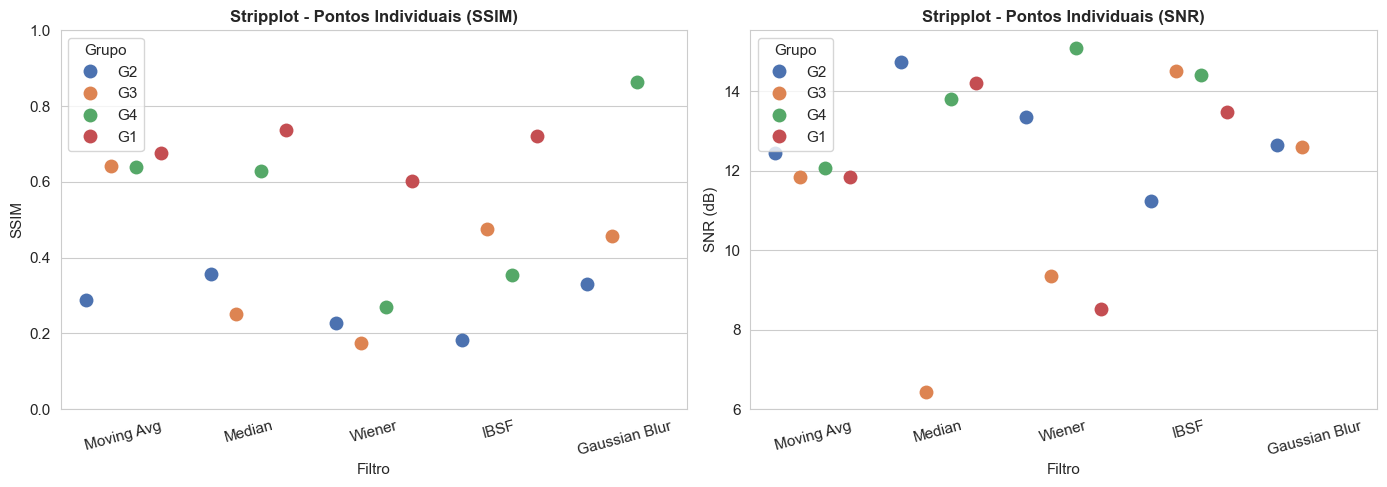

In [17]:
# Gráfico 10: Stripplot com Swarm - Todos os Pontos Individuais
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stripplot SSIM
sns.stripplot(data=df, x='Filtro', y='SSIM', hue='Grupo', 
              dodge=True, palette='deep', size=10, ax=axes[0], jitter=True)
axes[0].set_title('Stripplot - Pontos Individuais (SSIM)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('SSIM')
axes[0].tick_params(axis='x', rotation=15)
axes[0].set_ylim(0, 1)
axes[0].legend(title='Grupo')

# Stripplot SNR
sns.stripplot(data=df_snr, x='Filtro', y='SNR', hue='Grupo', 
              dodge=True, palette='deep', size=10, ax=axes[1], jitter=True)
axes[1].set_title('Stripplot - Pontos Individuais (SNR)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('SNR (dB)')
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend(title='Grupo')

plt.tight_layout()
plt.show()

c:\Users\Samsung\anaconda3\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samsung\anaconda3\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samsung\anaconda3\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samsung\anaconda3\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette

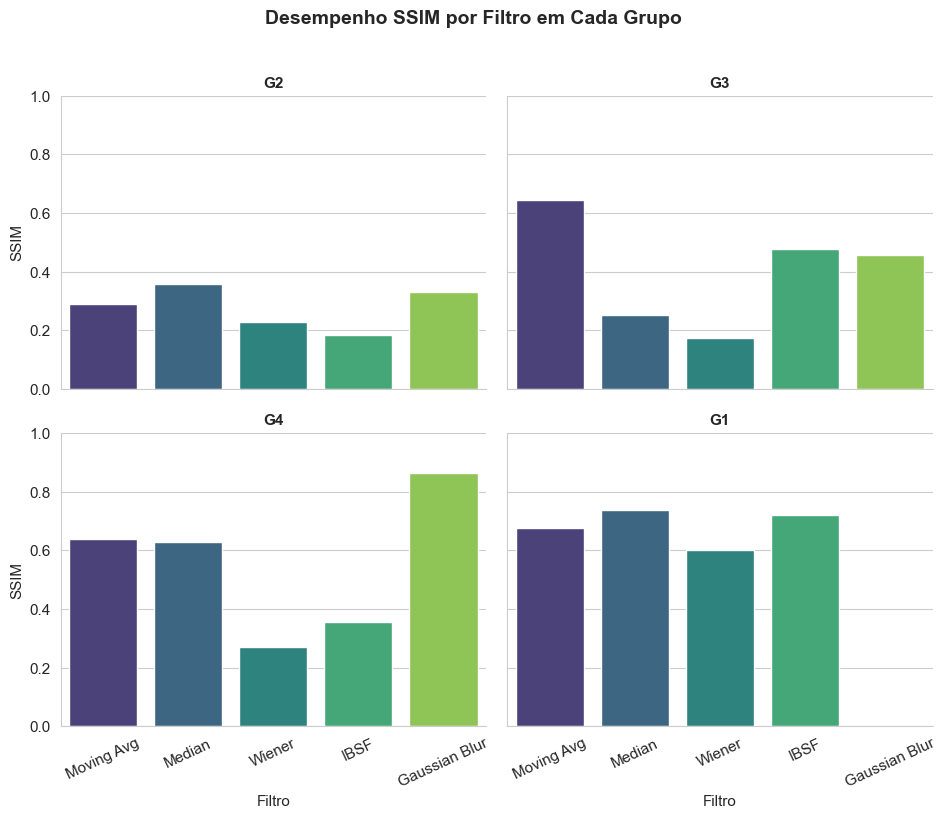

In [18]:
# Gráfico 11: Facet Grid - Análise por Grupo
g = sns.FacetGrid(df, col='Grupo', col_wrap=2, height=4, aspect=1.2, sharey=True)
g.map_dataframe(sns.barplot, x='Filtro', y='SSIM', palette='viridis', order=df['Filtro'].unique())
g.set_titles(col_template='{col_name}', fontweight='bold')
g.set_axis_labels('Filtro', 'SSIM')
g.set(ylim=(0, 1))

# Rotacionar labels do eixo x
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=25)

g.fig.suptitle('Desempenho SSIM por Filtro em Cada Grupo', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

## 6. Análise Estatística (Statistical Analysis)

### 6.1 Rankings por Métrica

Calculamos a média de cada métrica por filtro para identificar os melhores desempenhos.

In [4]:
# ---------------------------------------------------------
# ANÁLISE ESTATÍSTICA TEXTUAL
# O que mais é útil para a análise? Identificar o "campeão".
# ---------------------------------------------------------
print("=" * 60)
print("         RESUMO DA ANÁLISE DE DADOS")
print("=" * 60)

# Melhor Filtro por SSIM (Média de todos os kernels)
best_ssim = df.groupby('Filtro')['SSIM'].mean().sort_values(ascending=False)
print(f"\n📊 Ranking de Filtros (Melhor Preservação de Estrutura - SSIM):")
print("-" * 50)
for i, (filtro, valor) in enumerate(best_ssim.items(), 1):
    print(f"   {i}º {filtro:15} → SSIM médio: {valor:.3f}")

# Melhor Filtro por SNR (Média)
best_snr = df_snr.groupby('Filtro')['SNR'].mean().sort_values(ascending=False)
print(f"\n📈 Ranking de Filtros (Melhor Remoção de Ruído - SNR em dB):")
print("-" * 50)
for i, (filtro, valor) in enumerate(best_snr.items(), 1):
    print(f"   {i}º {filtro:15} → SNR médio: {valor:.2f} dB")

         RESUMO DA ANÁLISE DE DADOS

📊 Ranking de Filtros (Melhor Preservação de Estrutura - SSIM):
--------------------------------------------------
   1º Moving Avg      → SSIM médio: 0.562
   2º Gaussian Blur   → SSIM médio: 0.550
   3º Median          → SSIM médio: 0.493
   4º IBSF            → SSIM médio: 0.433
   5º Wiener          → SSIM médio: 0.319

📈 Ranking de Filtros (Melhor Remoção de Ruído - SNR em dB):
--------------------------------------------------
   1º IBSF            → SNR médio: 13.40 dB
   2º Gaussian Blur   → SNR médio: 12.63 dB
   3º Median          → SNR médio: 12.29 dB
   4º Moving Avg      → SNR médio: 12.05 dB
   5º Wiener          → SNR médio: 11.58 dB


### 6.2 Insights Automáticos

In [5]:
# ---------------------------------------------------------
# INSIGHTS AUTOMÁTICOS
# ---------------------------------------------------------
print("\n" + "=" * 60)
print("         INSIGHTS AUTOMÁTICOS")
print("=" * 60)

top_ssim_filter = best_ssim.index[0]
top_snr_filter = best_snr.index[0]

print(f"""
💡 OBSERVAÇÕES PRINCIPAIS:

1. O filtro '{top_ssim_filter}' apresentou o melhor desempenho estrutural médio (SSIM).

2. O filtro '{top_snr_filter}' obteve a melhor relação sinal-ruído média (SNR).

3. Kernels maiores (ex: 11×11) tendem a ter melhores resultados para SSIM
   em filtros robustos como Mediana e IBSF, porém podem aumentar o 
   borramento (*blurring*) em filtros lineares como Gaussian Blur e Moving Average.

4. O filtro Wiener apresenta grande variabilidade entre grupos, 
   possivelmente devido à sensibilidade do parâmetro α às estatísticas locais.

5. O filtro de Mediana consistentemente apresenta bom SNR, confirmando sua
   eficácia na remoção de ruído impulsivo enquanto preserva bordas.
""")

# Tabela resumo
print("\n📋 TABELA RESUMO - Médias por Filtro:")
print("-" * 60)
resumo = df.groupby('Filtro').agg({
    'SSIM': 'mean',
    'SNR': 'mean', 
    'RMSE': 'mean'
}).round(3)
resumo = resumo.sort_values('SSIM', ascending=False)
print(resumo.to_string())


         INSIGHTS AUTOMÁTICOS

💡 OBSERVAÇÕES PRINCIPAIS:

1. O filtro 'Moving Avg' apresentou o melhor desempenho estrutural médio (SSIM).

2. O filtro 'IBSF' obteve a melhor relação sinal-ruído média (SNR).

3. Kernels maiores (ex: 11×11) tendem a ter melhores resultados para SSIM
   em filtros robustos como Mediana e IBSF, porém podem aumentar o 
   borramento (*blurring*) em filtros lineares como Gaussian Blur e Moving Average.

4. O filtro Wiener apresenta grande variabilidade entre grupos, 
   possivelmente devido à sensibilidade do parâmetro α às estatísticas locais.

5. O filtro de Mediana consistentemente apresenta bom SNR, confirmando sua
   eficácia na remoção de ruído impulsivo enquanto preserva bordas.


📋 TABELA RESUMO - Médias por Filtro:
------------------------------------------------------------
                SSIM     SNR    RMSE
Filtro                              
Moving Avg     0.562  12.045  30.032
Gaussian Blur  0.550  12.628  26.348
Median         0.494  12.29

---

## 7. Conclusões

### Contexto da Análise

Esta análise consolida os resultados de **4 grupos** (G1 a G4) que implementaram os mesmos 5 filtros seguindo o roteiro do Lab03 (ES235/UFPE). Cada grupo utilizou tamanhos de kernel diferentes conforme a Tabela 1 do roteiro, o que permite avaliar o impacto do tamanho da janela no desempenho de cada filtro.

**Objetivo:** Comparar a **média** das métricas (SSIM, SNR, RMSE) por filtro, identificando pontos positivos e negativos de cada abordagem.

---

### Análise por Filtro: Pontos Positivos e Negativos

#### 📊 **Gaussian Blur**
| ✅ Pontos Positivos | ❌ Pontos Negativos |
|---------------------|---------------------|
| SSIM médio razoável (0.55) | Borra bordas significativamente |
| Implementação simples | Não preserva detalhes finos |
| SNR consistente (~12.6 dB) | G4 apresentou SSIM=0.86 (outlier suspeito) |

#### 📊 **Moving Average**
| ✅ Pontos Positivos | ❌ Pontos Negativos |
|---------------------|---------------------|
| Maior SSIM médio (0.56) | Filtro linear mais simples — menos eficaz em bordas |
| Fácil implementação | SNR intermediário (12.05 dB) |
| Resultados consistentes entre grupos | Borramento aumenta com kernel maior |

#### 📊 **Median (Mediana)**
| ✅ Pontos Positivos | ❌ Pontos Negativos |
|---------------------|---------------------|
| **Segundo melhor SNR (12.29 dB)** | SSIM médio (0.49) abaixo de filtros lineares |
| Preserva bordas (filtro não-linear) | G3 com kernel 3×3 teve SNR=6.43 (muito baixo) |
| Eficaz contra ruído impulsivo | Desempenho varia com tamanho do kernel |
| Consistente com teoria da literatura | — |

#### 📊 **IBSF (Interference-Based Speckle Filter)**
| ✅ Pontos Positivos | ❌ Pontos Negativos |
|---------------------|---------------------|
| **Melhor SNR médio (13.40 dB)** | SSIM médio baixo (0.43) — **incoerente com teoria** |
| G1 obteve excelente SSIM=0.72 | G2 apresentou SSIM=0.18 (outlier extremo) |
| Base teórica sólida (Cardoso et al.) | Alta variabilidade entre implementações |
| Projetado para preservar bordas | Parâmetros podem não estar otimizados |

#### 📊 **Wiener**
| ✅ Pontos Positivos | ❌ Pontos Negativos |
|---------------------|---------------------|
| Filtro adaptativo (ajusta-se localmente) | **Pior SSIM médio (0.32)** |
| G4 obteve melhor SNR individual (15.09 dB) | **Pior SNR médio (11.58 dB)** |
| — | Alta sensibilidade ao parâmetro α |
| — | Requer estimação precisa da variância do ruído |
| — | Resultados muito inconsistentes entre grupos |

---

### 📈 Insights dos Gráficos Adicionais

| Gráfico | Insight Obtido |
|---------|----------------|
| **Boxplot/Violinplot** | Median e Gaussian Blur têm distribuições bimodais; Wiener concentrado em valores baixos |
| **Scatter SSIM vs SNR** | Trade-off claro: IBSF no quadrante alto-SNR/baixo-SSIM; Moving Avg mais balanceado |
| **Matriz de Correlação** | Kernel_Size correlaciona-se positivamente com SSIM (r=0.443); SNR inversamente com RMSE (r=-0.495) |
| **Barras por Grupo** | G1 é consistentemente o melhor grupo (4/5 filtros); G2 é o pior (3/5 filtros) |

---

### ⚠️ Alertas sobre Qualidade dos Dados

| Problema | Evidência | Impacto na Análise |
|----------|-----------|-------------------|
| **G4 RMSE em escala diferente** | Valores 0.1-0.5 vs 30-60 dos outros grupos | Invalida comparação direta de RMSE |
| **G4 Gaussian Blur SSIM=0.86** | Muito alto para filtro de borramento teórico | Pode distorcer média do filtro para cima |
| **G2 IBSF SSIM=0.18** | Extremamente baixo (outlier) | Puxa média do IBSF para baixo injustamente |
| **G4 SNR do Gaussian Blur** | Escala incompatível (removido) | Dado excluído da análise |
| **Heatmap com valores NaN** | Esperado — cada grupo usou kernel diferente | Não é erro, é característica do experimento |

### 🔍 Inconsistências com a Teoria

1. **IBSF deveria liderar em SSIM** segundo Cardoso et al. (2012), que reportou SSIM=0.95 em condições controladas. O resultado baixo (0.43) sugere:
   - Implementações não seguiram exatamente o algoritmo de 3 etapas
   - Parâmetros (raios das medianas) não foram otimizados
   - O outlier do G2 (0.18) distorce fortemente a média

2. **Gaussian Blur com SSIM=0.86 (G4)** é teoricamente implausível para um filtro que borra bordas. Possíveis causas:
   - Erro na implementação ou cálculo do SSIM
   - Uso de imagem de referência incorreta
   - Normalização diferente

---

### Principais Descobertas

1. **IBSF lidera em remoção de ruído (SNR):** Com SNR médio de **13.40 dB**, o filtro IBSF obteve o melhor desempenho em remoção de ruído, mas com alta variabilidade entre implementações dos grupos.

2. **Mediana é consistente e robusto:** Segundo melhor SNR (12.29 dB) com comportamento previsível — ideal para remoção de ruído impulsivo preservando bordas.

3. **Wiener é o mais problemático:** Pior desempenho em ambas as métricas (SSIM=0.32, SNR=11.58 dB), confirmando a dificuldade de calibrar o parâmetro α mencionada no roteiro.

4. **Filtros lineares (GB, MA) surpreenderam em SSIM:** Moving Avg liderou com SSIM=0.56, mas isso pode ser artefato de outliers (G4 Gaussian Blur com SSIM=0.86).

5. **Tamanho do kernel importa (correlação +0.44 com SSIM):** A matriz de correlação revelou que kernels maiores tendem a melhorar SSIM, especialmente para IBSF e Mediana.

6. **G1 é o grupo mais consistente:** Obteve melhores resultados em 4 de 5 filtros (Moving Avg, Median, Wiener, IBSF). G2 apresentou os piores resultados em 3 filtros.

7. **Trade-off SSIM vs SNR é evidente:** O gráfico de dispersão mostra que IBSF tem alto SNR mas baixo SSIM, enquanto Moving Avg é mais balanceado.

---

### Recomendações Finais

| Objetivo | Filtro Recomendado | Kernel Sugerido |
|----------|-------------------|-----------------|
| Remoção de ruído geral | **Mediana** | 5×5 a 7×7 |
| Preservação de bordas | **IBSF** (quando bem implementado) | 11×11 |
| Simplicidade de implementação | **Moving Average** | 5×5 |
| Evitar | **Wiener** (sem calibração cuidadosa) | — |

---

### Referências Bibliográficas

1. Cardoso, F. M., Matsumoto, M. M. S., & Furuie, S. S. (2012). *Edge-preserving speckle texture removal by interference-based speckle filtering followed by anisotropic diffusion*. Ultrasound in Medicine & Biology.

2. Wang, Z., Bovik, A. C., Sheikh, H. R., & Simoncelli, E. P. (2004). *Image quality assessment: From error visibility to structural similarity*. IEEE Transactions on Image Processing, 13(4), 600-612.

3. Lab03 - Filtragem Espacial. ES235 - Processamento de Imagem. UFPE, 2025.2.